# Linear Regression
## Brandon Shellenberger
### Repository https://github.com/Bshell13/datafun-07-ml

In [16]:
import pandas as pd
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

### Charting Temperatures with Fahrenheit and Celsius

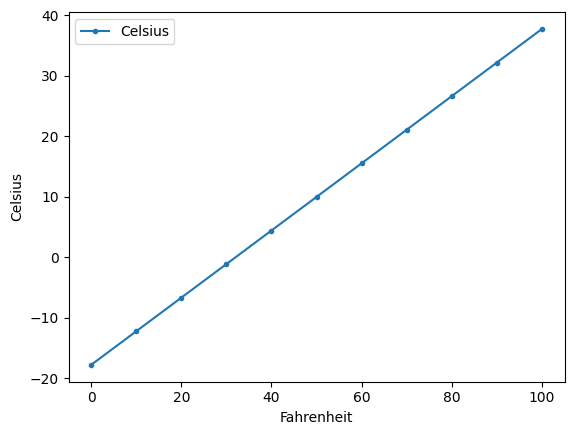

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [4]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895_2018.csv')

### Section 2 - Data Inspection

In [5]:
print(nyc_df.head())
print(nyc_df.tail())

     Date  Value  Anomaly
0  189501   34.2     -2.4
1  189601   33.2     -3.4
2  189701   34.0     -2.6
3  189801   38.5      1.9
4  189901   34.9     -1.7
       Date  Value  Anomaly
119  201401   35.5     -1.1
120  201501   36.1     -0.5
121  201601   40.8      4.2
122  201701   42.8      6.2
123  201801   38.7      2.1


### Section 3 - Data Cleaning

In [6]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head())

     Date  Temperature  Anomaly
0  189501         34.2     -2.4
1  189601         33.2     -3.4
2  189701         34.0     -2.6
3  189801         38.5      1.9
4  189901         34.9     -1.7


In [7]:
# Checking Date column type
print(nyc_df.Date.dtype)

int64


In [8]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-2.4
1,1896,33.2,-3.4
2,1897,34.0,-2.6


### Section 4 - Descriptive Statistics

In [10]:
# Display precistion to 2 decimal places
pd.set_option('display.precision', 2)

print(nyc_df.Temperature.describe())

count    124.00
mean      36.88
std        4.59
min       25.50
25%       33.83
50%       36.65
75%       39.82
max       47.60
Name: Temperature, dtype: float64


### Section 5 - Build the Model

In [15]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(f'Slope: {linear_regression.slope}')
print(f'y-intercept: {linear_regression.intercept}')

Slope: 0.02766136900078678
y-intercept: -17.23882328874901


### Section 6 - Predict

In [14]:
# predicting temp for 2024
print(f'Jan 2024 Highest: {linear_regression.slope * 2024 + linear_regression.intercept}')

Jan 2024 Highest: 38.74778756884343


### Section 7 - Visualizations

Text(0.5, 1.0, 'Avg High Temps in NYC in January')

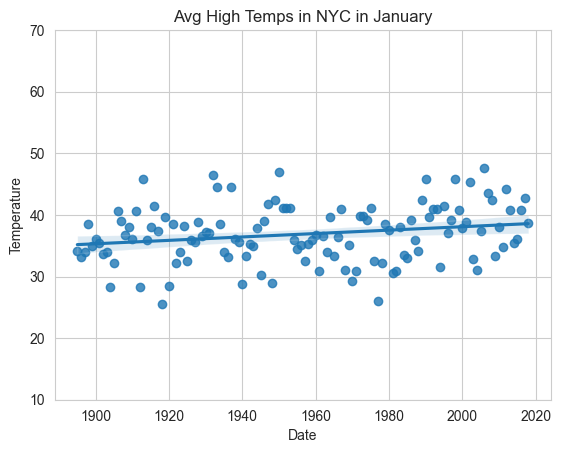

In [19]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)
axes.set_title('Avg High Temps in NYC in January')